In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [3]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

In [4]:
def xor_label(df):
    rtn = []
    for i in range(50):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn
xor_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
xor_df['Label'] = xor_label(xor_df)

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X.values, y.values) 

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X.values, y.values) 

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X.values, y.values) 

clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X.values, y.values) 

/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aidanakamine/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

accuracy for linear svm: 72.0%
accuracy for polynomial svm: 70.0%
accuracy for rbf svm: 98.0%
accuracy for sigmoid svm: 60.0%


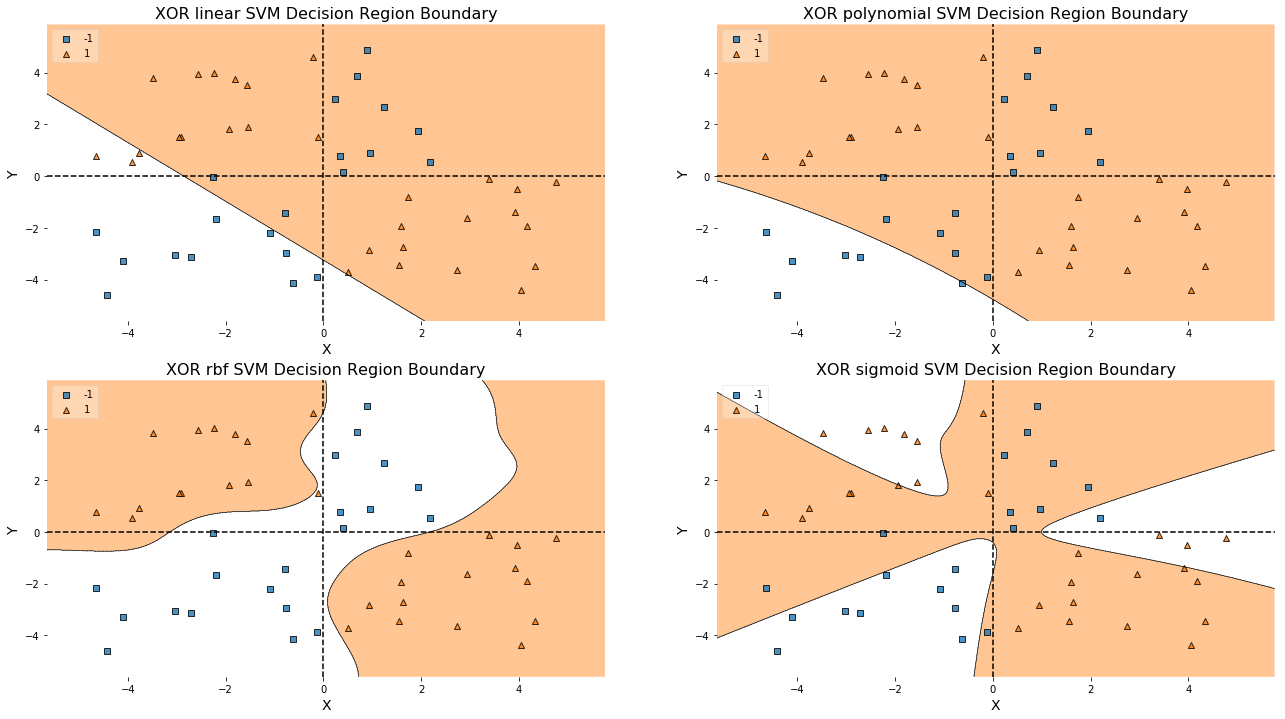

In [5]:
print("accuracy for linear svm: " + str(clf_lin.score(X.values, y.values)*100 )+ "%")
print("accuracy for polynomial svm: " + str(clf_poly.score(X.values, y.values)*100 )+ "%")
print("accuracy for rbf svm: " + str(clf_rbf.score(X.values, y.values)*100 )+ "%")
print("accuracy for sigmoid svm: " + str(clf_sigmoid.score(X.values, y.values)*100 )+ "%")

plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_lin, X, y, "XOR linear SVM Decision Region Boundary", 1, dims)
define_plot(clf_poly, X, y, "XOR polynomial SVM Decision Region Boundary", 2, dims)
define_plot(clf_rbf, X, y, "XOR rbf SVM Decision Region Boundary", 3, dims)
define_plot(clf_sigmoid, X, y, "XOR sigmoid SVM Decision Region Boundary", 4, dims)

plt.show()